In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/BP_data/archive.zip

Archive:  /content/gdrive/MyDrive/BP_data/archive.zip
  inflating: Samples/rec_1.csv       
  inflating: Samples/rec_10.csv      
  inflating: Samples/rec_100.csv     
  inflating: Samples/rec_101.csv     
  inflating: Samples/rec_102.csv     
  inflating: Samples/rec_103.csv     
  inflating: Samples/rec_104.csv     
  inflating: Samples/rec_105.csv     
  inflating: Samples/rec_106.csv     
  inflating: Samples/rec_107.csv     
  inflating: Samples/rec_108.csv     
  inflating: Samples/rec_109.csv     
  inflating: Samples/rec_11.csv      
  inflating: Samples/rec_110.csv     
  inflating: Samples/rec_111.csv     
  inflating: Samples/rec_112.csv     
  inflating: Samples/rec_113.csv     
  inflating: Samples/rec_114.csv     
  inflating: Samples/rec_115.csv     
  inflating: Samples/rec_116.csv     
  inflating: Samples/rec_117.csv     
  inflating: Samples/rec_118.csv     
  inflating: Samples/rec_119.csv     
  inflating: Samples/rec_12.csv      
  inflating: Samples/rec_120.csv  

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from pathlib import Path
import glob
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
# importing libraries
import numpy as np # For numerical computation
import pandas as pd # Data manipulation
import seaborn as sns # plotting
import scipy.io # reading matlab files in python
from scipy import signal #signal processing
from scipy.fftpack import fft, dct #signal processing

from sklearn.linear_model import LinearRegression #linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt # For plotting graphs(Visualization)

import os # system-wide functions


In [ ]:
sample_file = scipy.io.loadmat(f'/content/part_1.mat')
print(f'sample_file Data type: {type(sample_file)}')
print(f'sample_file keys:\n{sample_file.keys()}')

sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])


In [ ]:
# Loading a sample .mat file to understand the data dimensions
test_sample = scipy.io.loadmat(f'/content/part_1.mat')['p']
print(f'test_sample Data type: {type(test_sample)}')
print(f'test_sample shape/dimensions: {test_sample.shape}')

test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)


In [ ]:
print(f"Total Samples: {len(test_sample[0])}")
print(f"Number of readings in each sample(column): {len(test_sample[0][0])}")
print(f"Number of samples in each reading(ECG): {len(test_sample[0][0][2])}")

temp_mat = test_sample[0, 999]
temp_length = temp_mat.shape[1]
sample_size = 125


print(temp_length)
print((int)(temp_length/sample_size))

Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 61000
9000
72


In [ ]:
temp_mat.shape

(3, 9000)

In [ ]:
sample_size = 125
ppg = []
for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
        ppg.append(temp_ppg)

In [ ]:
ecg = []
bp = []
sbp = [] #Systolic Blood Pressure
dbp = [] #Diastolic Blood Pressue
size = 125 #sample size

for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ecg = temp_mat[2, j*size:(j+1)*size]
        temp_bp = temp_mat[1, j*size:(j+1)*size]
        
        max_value = max(temp_bp)
        min_value = min(temp_bp)
        
        sbp.append(max_value)
        dbp.append(min_value)
        ecg.append(temp_ecg)
        bp.append(temp_bp)

In [ ]:
# Reshaping the ecg, ppg and bp signal data into column vectors
ppg, ecg, bp = np.array(ppg).reshape(-1,1), np.array(ecg).reshape(-1,1), np.array(bp).reshape(-1,1)
sbp, dbp = np.array(sbp).reshape(-1,1), np.array(dbp).reshape(-1,1)
print(f'PPG_shape: {ppg.shape}\n ECG_shape: {ecg.shape}\n BP_shape: {bp.shape}')
print(f'Systolic-BP_shape: {sbp.shape},\n Diastolic-BP_shape: {dbp.shape}')

PPG_shape: (32061000, 1)
 ECG_shape: (32061000, 1)
 BP_shape: (32061000, 1)
Systolic-BP_shape: (256488, 1),
 Diastolic-BP_shape: (256488, 1)


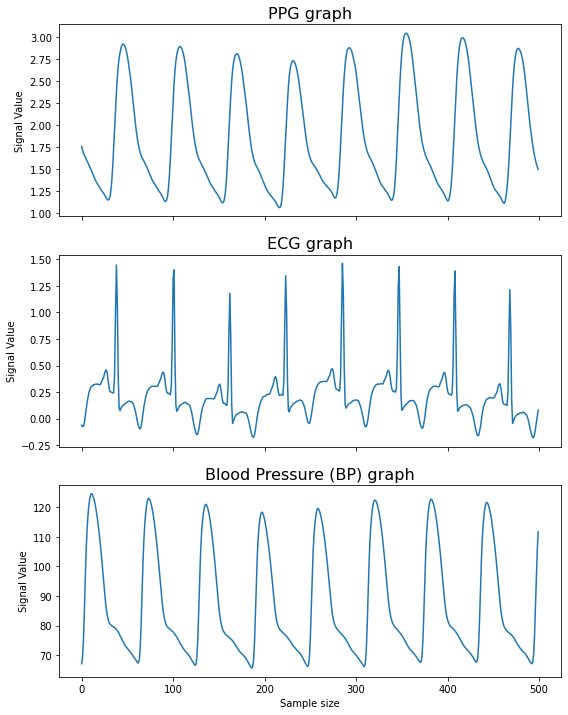

In [ ]:
##plotting sample ppg, ecg and bp signals
##using a sample size of 500
fig, ax = plt.subplots(3,1, figsize=(9,12), sharex=True)

ax[0].set_title('PPG graph', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(ppg[:500])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(ecg[:500])

ax[2].set_title('Blood Pressure (BP) graph', fontsize=16)
ax[2].set_ylabel('Signal Value')
ax[2].set_xlabel('Sample size')
ax[2].plot(bp[:500])

In [ ]:
Map=(sbp+ (2*dbp))/3

Text(0, 0.5, 'Map')

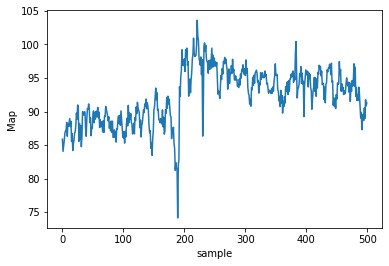

In [ ]:
plt.plot(Map[:500])
plt.xlabel("sample")
plt.ylabel("Map")

In [ ]:
s=0
size=15*125
e=15*125
necgs=[]
nbps=[]
while(e<len(ecg)):
  necgs.append(ecg[s:e])
  nbps.append(bp[s:e])
  s+=size
  e+=size


In [ ]:
necgs=np.array(necgs)
nbps=np.array(nbps)

In [ ]:
necgs.shape

(17099, 1875, 1)

In [ ]:
nbps.shape

(17099, 1875, 1)

In [ ]:
nbps=nbps.reshape(17099,1875)

In [ ]:
nbps.shape

(17099, 1875)

In [ ]:
necgs=necgs.reshape(17099,1875)

In [ ]:
necgs.shape

(17099, 1875)

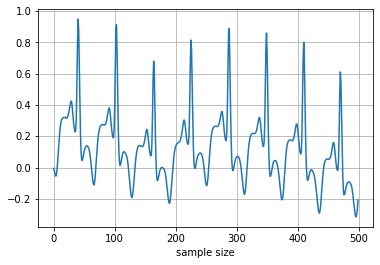

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 500.0
    lowcut = 0.1
    highcut = 50.0
    y = butter_bandpass_filter(necgs[0], lowcut, highcut, fs, order=2)
    plt.plot(y[:500])
    plt.xlabel('sample size')
    plt.grid(True)

    plt.show()


run()

In [ ]:
fs = 500.0
lowcut = 0.1
highcut = 50.0
necgs_new=[]
for i in range(len(necgs)):
  necgs_new.append(butter_bandpass_filter(necgs[i], lowcut, highcut, fs, order=2))

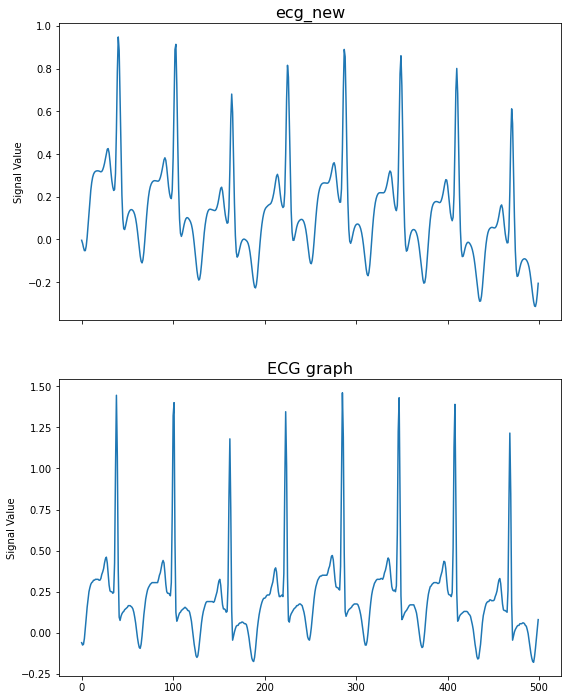

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(9,12), sharex=True)

ax[0].set_title('ecg_new', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(necgs_new[0][:500])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(necgs[0][:500])

In [ ]:
pip install neurokit2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.2 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal
import scipy.stats
import neurokit2 as nk

In [ ]:
necgs_new=np.array(necgs_new)

In [ ]:
necgs_new.shape

(17099, 1875)

In [ ]:
for i in range(len(necgs_new)):
  necgs_new[i]=necgs_new[i].reshape(len(necgs_new[i]))

In [ ]:
for i in range(len(nbps)):
  nbps[i]=nbps[i].reshape(len(nbps[i]))

In [ ]:
necgs_new.shape

(17099, 1875)

In [ ]:
nbps.shape

(17099, 1875)

In [ ]:
final_ecg=[]
final_bp=[]
for i in range(len(necgs_new)):
  _, rpeaks = nk.ecg_peaks(necgs_new[i], sampling_rate=50)
  a=[]
  for j in rpeaks.values():
    a.append(j)
  peak=[]
  peak=a[0]
  avg_d=0
  for j in range(1,len(peak)):
    avg_d+=peak[j]-peak[j-1]

  if len(peak)<=1:
    continue
  avg_d=avg_d/(len(peak)-1)
  flag=1
  for j in range(1,len(peak)):
    d=peak[j]-peak[j-1]
    if(d>avg_d+(0.1*avg_d)):
      flag=0
      break
    if(d<avg_d-(0.1*avg_d)):
      flag=0
      break
  if(flag==1):
    final_bp.append(nbps[i])
    final_ecg.append(necgs_new[i])





In [ ]:
len(final_bp)

6990

In [ ]:
final_bp=np.array(final_bp)
final_ecg=np.array(final_ecg)

In [ ]:
final_bp.shape

(6990, 1875)

In [ ]:
final_ecg.shape

(6990, 1875)

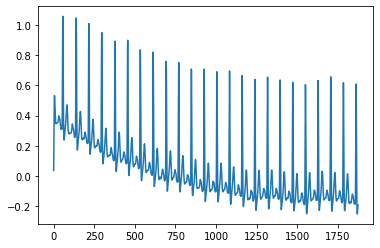

In [ ]:
plt.plot(final_ecg[6000])

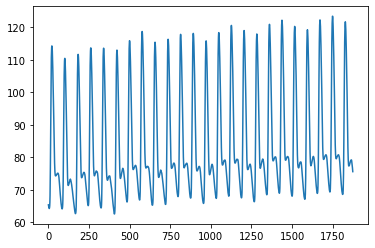

In [ ]:
plt.plot(final_bp[6000])

In [ ]:
from matplotlib.patches import BoxStyle
all_peaks=[]
corr_bp=[]
for i in range(len(final_ecg)):
  e=final_ecg[i]
  bx=final_bp[i]
  _, rpeaks = nk.ecg_peaks(e, sampling_rate=50)
  a=[]
  for j in rpeaks.values():
    a.append(j)
  peak=[]
  peak=a[0]
  ind=0
  while ind+3<len(peak):
    jx=peak[ind]
    k=peak[ind+3]
    temp=e[jx:k+1]
    b=bx[jx:k+1]
    all_peaks.append(temp)
    corr_bp.append(b)
    ind+=4


In [ ]:
len(all_peaks)

32769

In [ ]:
all_peaks=np.array(all_peaks)
corr_bp=np.array(corr_bp)

In [ ]:
all_peaks.shape

(32769,)

In [ ]:
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift
import scipy.fft
f=scipy.signal.resample(all_peaks[1], 120)
b=scipy.signal.resample(corr_bp[1], 120)


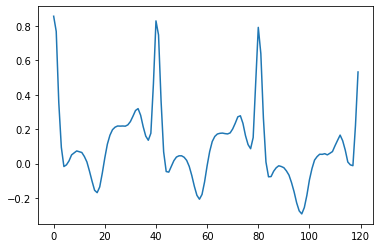

In [ ]:
plt.plot(f)

In [ ]:
f_peak=[]
f_bp=[]
for i in range(len(all_peaks)):
    f=scipy.signal.resample(all_peaks[i], 120)
    b=scipy.signal.resample(corr_bp[i], 120)
    f_peak.append(f);
    f_bp.append(b)


In [ ]:
f_peak=np.array(f_peak)
f_bp=np.array(f_bp)

In [ ]:
f_peak.shape

(32769, 120)

In [ ]:
f_bp.shape

(32769, 120)

In [ ]:
peak_sbp=[]
peak_dbp=[]
for i in f_bp:
  peak_sbp.append(max(i))
  peak_dbp.append(min(i))

In [ ]:
peak_sbp=np.array(peak_sbp)
peak_dbp=np.array(peak_dbp)

In [ ]:
peak_sbp.shape

(32769,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(f_peak,peak_sbp, test_size=0.33)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(y_true, y_pred):
    """Computes the Root Mean Squared Error (RMSE)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
folds = KFold(n_splits=5, shuffle=False)
scores = []
for i, (train_index, val_index) in enumerate(folds.split(X_train, y_train)):
    train_data, target = X_train[train_index], y_train[train_index]
    validation_data, val_target = X_train[val_index], y_train[val_index]
    
    model = AdaBoostRegressor(random_state=1, n_estimators=100)
    model.fit(train_data, target)
    #model = RandomForestRegressor(n_estimators=50,max_depth=5, n_jobs=-1, random_state=42)
    #model.fit(train_data[:100000], target[:100000].squeeze())  # training on few samples to save time.
    val_predictions_sbp = model.predict(validation_data)
    error = rmse(val_target, val_predictions_sbp)
    scores.append(error)
    print(f'Fold {i} RMSE: {error}')
print(f'Average RMSE over 5 folds: {np.mean(scores)}')

Fold 0 RMSE: 19.536442876225554
Fold 1 RMSE: 19.725467729829262
Fold 2 RMSE: 19.60273416510072
Fold 3 RMSE: 20.14824470970116
Fold 4 RMSE: 19.320641615191736
Average RMSE over 5 folds: 19.666706219209686


In [ ]:
# from sklearn.ensemble import AdaBoostRegressor
# regr = AdaBoostRegressor(random_state=1, n_estimators=100,loss='exponential')
# regr.fit(X_train, y_train)

In [ ]:
# x=regr.predict(X_test)

In [ ]:
# plt.scatter(X_test,y_test)
# plt.scatter(X_test,x)

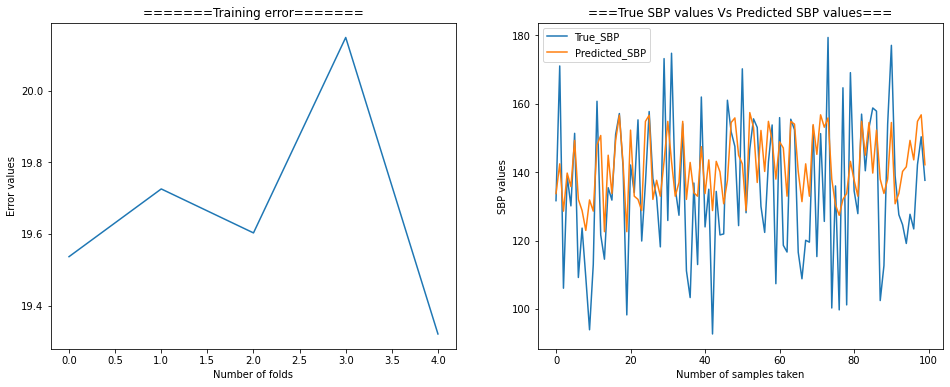

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].set_title("=======Training error=======")
ax[0].set_xlabel('Number of folds')
ax[0].set_ylabel('Error values')
ax[0].plot(scores)

# Visualize predicted BP and the True BP
ax[1].set_title("===True SBP values Vs Predicted SBP values===")
ax[1].set_xlabel('Number of samples taken')
ax[1].set_ylabel('SBP values')
ax[1].plot(val_target[:100]) #only plotting 100 samples
ax[1].plot(val_predictions_sbp[:100])
ax[1].legend(['True_SBP', 'Predicted_SBP'])

In [ ]:
mean_absolute_error(val_target, val_predictions_sbp)

15.850666406829212

In [ ]:
print(val_predictions_sbp)

[133.73583856 142.42549285 128.59137196 ... 133.92658448 149.28367715
 137.9500551 ]


#DBP



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(f_peak,peak_dbp, test_size=0.33)

In [ ]:
folds = KFold(n_splits=5, shuffle=False)
scores = []
for i, (train_index, val_index) in enumerate(folds.split(X_train, y_train)):
    train_data, target = X_train[train_index], y_train[train_index]
    validation_data, val_target = X_train[val_index], y_train[val_index]
    
    model_dbp = AdaBoostRegressor(random_state=1, n_estimators=100)
    model_dbp.fit(train_data, target)
    #model = RandomForestRegressor(n_estimators=50,max_depth=5, n_jobs=-1, random_state=42)
    #model.fit(train_data[:100000], target[:100000].squeeze())  # training on few samples to save time.
    val_predictions_dbp = model_dbp.predict(validation_data)
    error = rmse(val_target, val_predictions_dbp)
    scores.append(error)
    print(f'Fold {i} RMSE: {error}')
print(f'Average RMSE over 5 folds: {np.mean(scores)}')

Fold 0 RMSE: 15.12806308537436
Fold 1 RMSE: 11.337925027201285
Fold 2 RMSE: 14.789399184732694
Fold 3 RMSE: 14.483717496915297
Fold 4 RMSE: 15.60037226447266
Average RMSE over 5 folds: 14.26789541173926


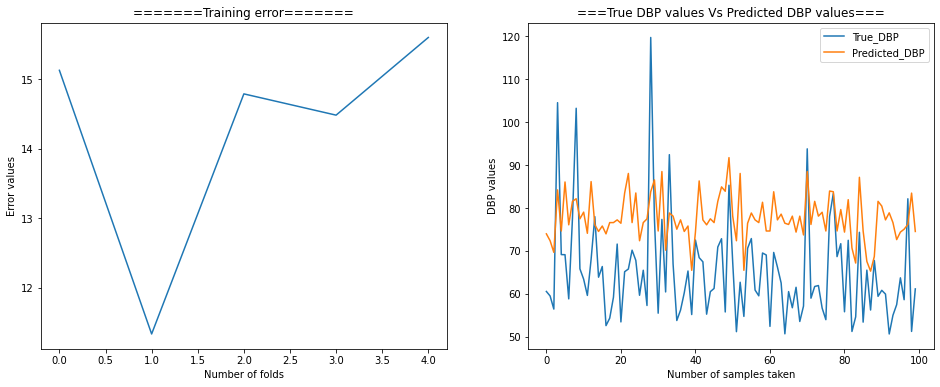

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].set_title("=======Training error=======")
ax[0].set_xlabel('Number of folds')
ax[0].set_ylabel('Error values')
ax[0].plot(scores)

# Visualize predicted BP and the True BP
ax[1].set_title("===True DBP values Vs Predicted DBP values===")
ax[1].set_xlabel('Number of samples taken')
ax[1].set_ylabel('DBP values')
ax[1].plot(val_target[:100]) #only plotting 100 samples
ax[1].plot(val_predictions_dbp[:100])
ax[1].legend(['True_DBP', 'Predicted_DBP'])

In [ ]:
mean_absolute_error(val_target, val_predictions_dbp)

13.70891259352805

In [ ]:
print(val_predictions_dbp)

[73.96893123 72.36239655 69.65324359 ... 74.94030845 75.05263113
 74.94030845]


In [ ]:
health_condition = []
category = ["Normal", "Prehypertension", "Hypertension"]
for i in range(len(val_predictions_sbp)):
  if (val_predictions_sbp[i] <= 90 or val_predictions_dbp[i] <= 60):
    health_condition.append(category[0])
  if ((val_predictions_sbp[i] >= 90 and val_predictions_sbp[i] < 120) and (val_predictions_dbp[i] >= 60 and val_predictions_dbp[i] < 79)):
    health_condition.append(category[0])
  if ((val_predictions_sbp[i] >= 120 and val_predictions_sbp[i] < 140) or (val_predictions_dbp[i] >= 80 and val_predictions_dbp[i] < 90)):
    health_condition.append(category[1])
  if ((val_predictions_sbp[i] >= 140 and val_predictions_sbp[i] < 160) or (val_predictions_dbp[i] >= 90 and val_predictions_dbp[i] < 100)):
    health_condition.append(category[2])
  if (val_predictions_sbp[i] >= 160 or val_predictions_dbp[i] >= 100):
    health_condition.append(category[2])
  if (val_predictions_sbp[i] >= 140 and val_predictions_dbp[i] < 90):
    health_condition.append(category[2])
  if (val_predictions_sbp[i] >= 180 or val_predictions_dbp[i] >= 110):
    health_condition.append(category[2])

In [ ]:
health_condition = np.array(health_condition)
print(health_condition)

['Prehypertension' 'Hypertension' 'Hypertension' ... 'Hypertension'
 'Hypertension' 'Prehypertension']
